## Import Libraries



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [21]:
df = pd.read_csv("diabetes.csv",index_col=0)

In [22]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,,,,,,,,,,,,,,,,
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## pre proceessing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Change Data values string to integer
for i in df:
    if i != "Age":
        df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,,,,,,,,,,,,,,,,
40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('class',axis=1)
Y = df['class']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,pred))

[[40  0]
 [ 0 64]]


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [35]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

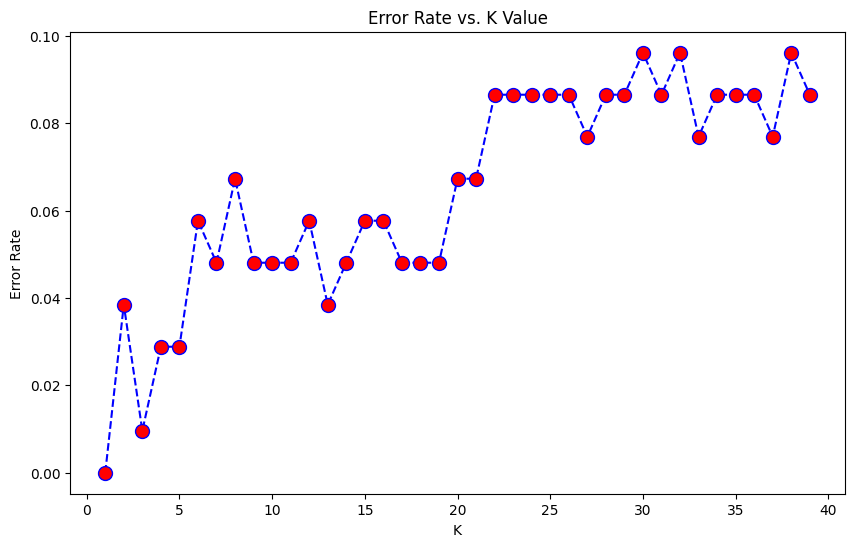

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Here we can see that after about K>2 the error rate increases, let's retrain the model with it and check the classification report!

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[40  0]
 [ 0 64]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [40]:
# NOW WITH K=8
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[39  1]
 [ 9 55]]


              precision    recall  f1-score   support

           0       0.81      0.97      0.89        40
           1       0.98      0.86      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.92      0.90       104
weighted avg       0.92      0.90      0.91       104

